### حل تمرین شماره یک - از کلاس آمار و احتمالات دوره دیتا تک دانشگاه خاتم
### استاد مربوطه: جناب دکترحاجی پور
#### دانشجو: شهرام مرادپور
#### دی ماه- 401


### مسئله فرضی برای خود انتخاب و هدف آن را ذکر کنید. متغیرهای مسئله را شرح دهید. حداقل اندازه دیتاست 50 عدد باشد


### مسئله انتخابی: پیش بینی زنده مانده مسافران کشتی تایتانیک
#### ابتدا دیتاست  و کتابخانه های مورد نظر را فراخوانی میکنیم

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
train = pd.read_csv('titanic_train.csv')

### نگاهی به وضعیت دیتا میاندازیم

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### اطلاعات بالا نشان میدهد این دیتا ست شامل اطلاعات زیر در مورد مسافران است
#### زنده ماندن یا نماندن، کلاس مسافری،نام- جنسیت - سن - وجود یا عدم وجود خویشاوندان - شماره بلیط - کرایه - ایستگاهی که سوار شده اند - شماره کابین


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### اطلاعات بالا نشان میدهد که چه تعداد مسافر داریم. درمورد سن تعدادی دیتای از دست رفته داریم. همچنین دیتای مربوط به کابین ناقص است

In [6]:
train.isnull()
## look at column (cabin) and (age)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### تعداد دیتاهای گم شده را با دستور زیر بدست می آوریم
#### که مربوط به سن و کابین است

In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

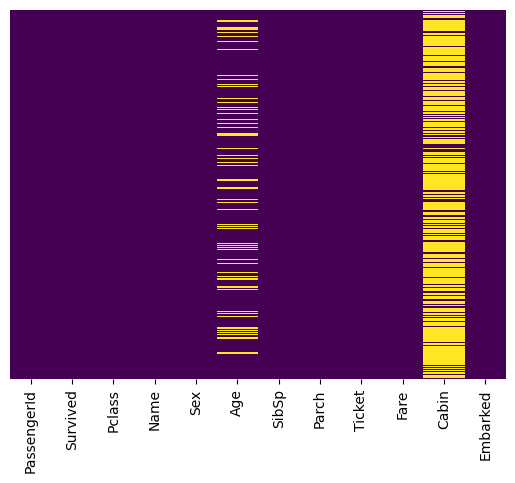

In [8]:
# نمایش گرافیکی دیتای از دست رفته
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### در نمودار زیر مشخص است که تعداد زنان نجات یافته بیشتر از مردان بوده اند 

<AxesSubplot:xlabel='Survived', ylabel='count'>

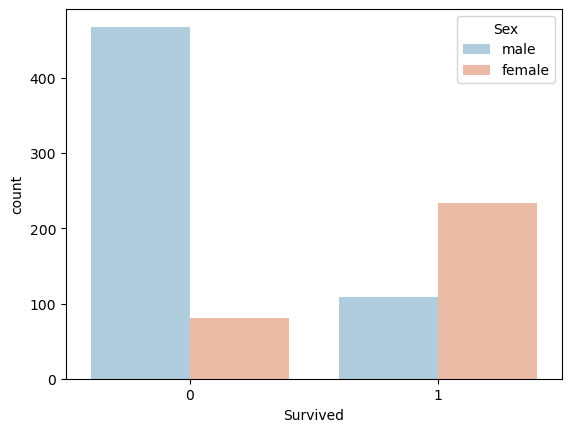

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### نمودار زیر نشان میدهد بیشتر افراد غرق شده از کلاس سه بوده اند

<AxesSubplot:xlabel='Survived', ylabel='count'>

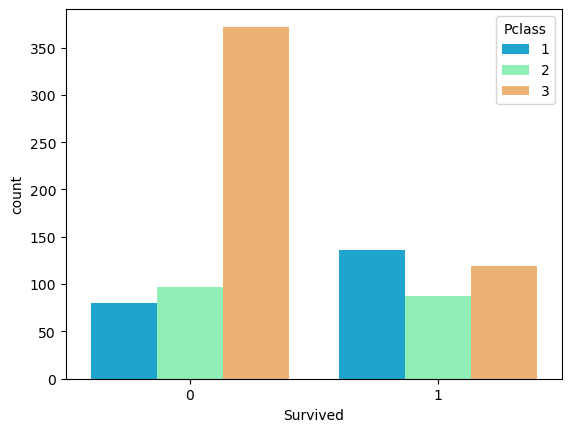

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

### نمودار زیر نشان میدهد درصد قابل توجهی از مسافران سنشان بین بیست تا چهل بوده و نیز تعداد نوزادان نیز بیشتر از کودکان بوده است  

<AxesSubplot:xlabel='Age', ylabel='Density'>

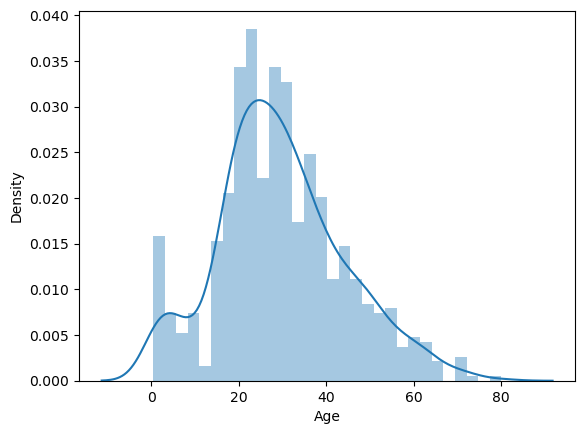

In [15]:
#sns.distplot(train['Age'].dropna(),kde=False,bins=30)
sns.distplot(train['Age'].dropna(),bins=30)

<AxesSubplot:ylabel='Frequency'>

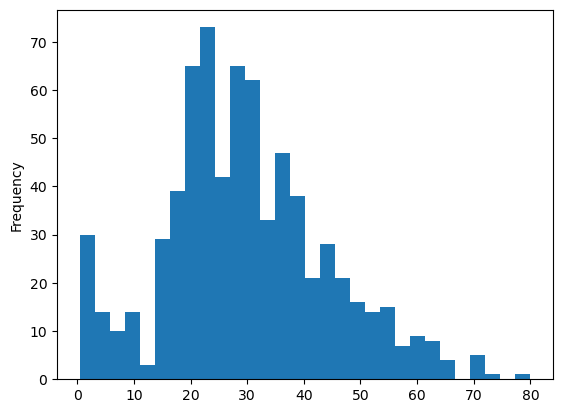

In [16]:
# مشاهده دقیق تر اطلاعات سن مسافران
train['Age'].plot.hist(bins=30)

### نمودار زیر نشان میدهد حدود ششصد نفر از افراد هیچ گونه خویشاوند یا بستگانی نداشته اند و حدود دویست نفر حداقل یک نفر همراه داشته اند 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

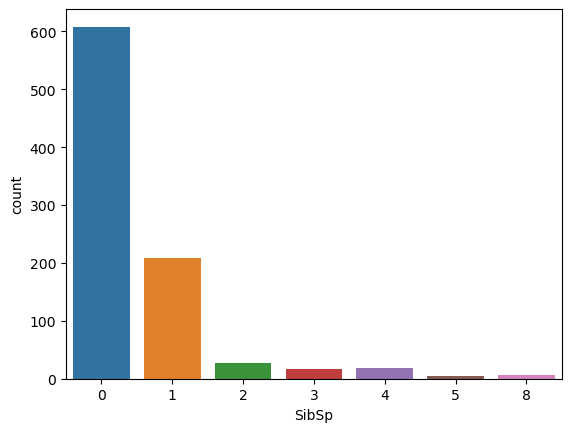

In [17]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

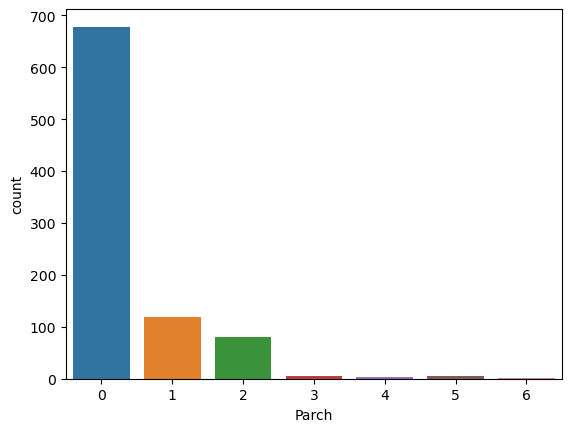

In [18]:
#Number of Parents/Children Aboard تعداد فرزندان یا والدین هر مسافر
sns.countplot(x='Parch',data=train)

###  نمودار زیر نشان میدهد میانگین سنی افراد در هر کلاس چه مقدار بوده است

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

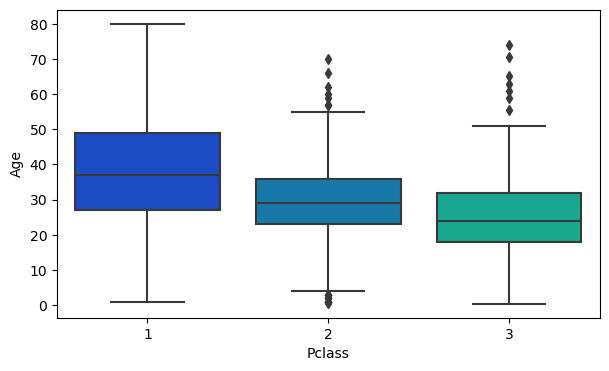

In [21]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# data cleaning

In [26]:
# میانگین سن افراد در کلاسهای یک تا سه

print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


### یک تابع تعریف میکنیم که دیتاهای ازدست رفته را با مقدار میانگین  کلاس متناسب آن جایگزین کند

In [27]:
def impute_age(cols): # cols=[Age , Pclass]
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

### حال تابع را روی ستون مربوط به سن از دیتاست خود اجرا میکنیم

In [29]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

### در نمودار زیر مشخص است که تمام مقادیر سن با مقدار میانگین پر شده اند

<AxesSubplot:>

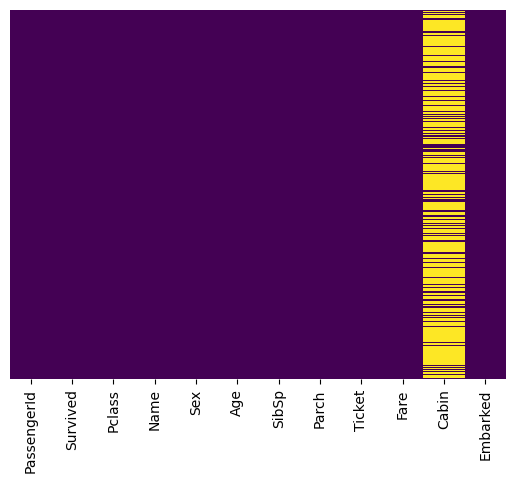

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### ستون کابین را به دلیل عدم اهمیت آن  در زنده ماندن یا غرق شدن، حذف میکنیم

In [31]:
train.drop('Cabin',axis=1,inplace=True)

In [33]:
# نگاهی به مقادیر موجود در ستون ایستگاه سوار شدن می اندازیم
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### در ستونی که مربوط به محل سوار شدن است سه دسته داریم و میتوان آن را به یک دسته تبدیل کرد
### دسته ای که اکثریت دارد را جایگزین میکنیم

In [35]:
train['Embarked'].replace(np.nan, 'S', inplace=True)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### تا اینجا توانستیم  مسئله سه ستون را که دیتای از دست رفته داشتند را حل کنیم

### با بررسی دیتا  متوجه مشویم که تعدادی از ستونها واقعا تاثیری بر پیش بینی زنده ماندن افراد ندارند.
### بنابراین میتوان آنها را حذف نمود.  این سه ستون عبارتند از نام و نام خانوادگی ، شماره بلیط و شماره مسافر
####  -------------------------------------------------
### همچنین ستون هایی که از جنس متغیر غیرعددی هستند را باید به متغیر عددی تبدیل کنیم
### این سه ستون عبارتند از جنسیت، کلاس و ایستگاه سوار شدن


In [37]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [38]:
# sex chaneged from (male, female) to (1 ,0)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


### ستونهای غیر ضروری و غیر عددی را حذف میکنیم

In [39]:
# deleting categorical and unimportant columns
train.drop(['PassengerId','Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

###  حال سه ستونی را که ساختیمم  را به دیتافریم خود می افزاییم

In [40]:
train = pd.concat([train,sex,embark,pclass],axis=1)

In [41]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## machnine learning

### ابتدا از  سایکیتلرن، کتابخانه مناسب را ایمپورت میکنیم

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test =\
train_test_split(train.drop('Survived',axis=1),  train['Survived'], test_size=0.30,  random_state=101)

## متناسب با نوع مسئله ما که خروجی گسسته از نوع بله یا خیر دارد مدل لاجستیگ رگرسیون را انتخاب میکنیم
### همچنین مدل ما از نوع تحت نظارت یا نظارت شده است.
### همچنین این  مسئله از نوع کلسیفیکیشن است

In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shahram\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Shahram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions = logmodel.predict(X_test)

C:\Users\Shahram\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [47]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

## Evaluation
### برای ارزیابی میزان دقت مدل از ماتریس پیچیدگی استفاده میکنیم

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[136,  18],
       [ 38,  76]], dtype=int64)

### همچنین مشاهده میشود که امتیاز اف یک مربوط به مدل ما  چه مقدار است

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

